In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('http://iali.in/datasets/cereal.csv')

In [3]:
print(df.shape)

(77, 16)


In [4]:
df.head(n=10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [5]:
df['mfr'].value_counts()

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['mfr'] = le.fit_transform(df['mfr'])

In [8]:
df['type'].value_counts()

C    74
H     3
Name: type, dtype: int64

In [9]:
#Dropping type columns
del df['type']

In [10]:
df.describe()

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2.727273,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,1.729286,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,0.000000,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,1.000000,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,2.000000,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,4.000000,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,6.000000,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [11]:
df.isna().sum()

name        0
mfr         0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [12]:
import seaborn as sns

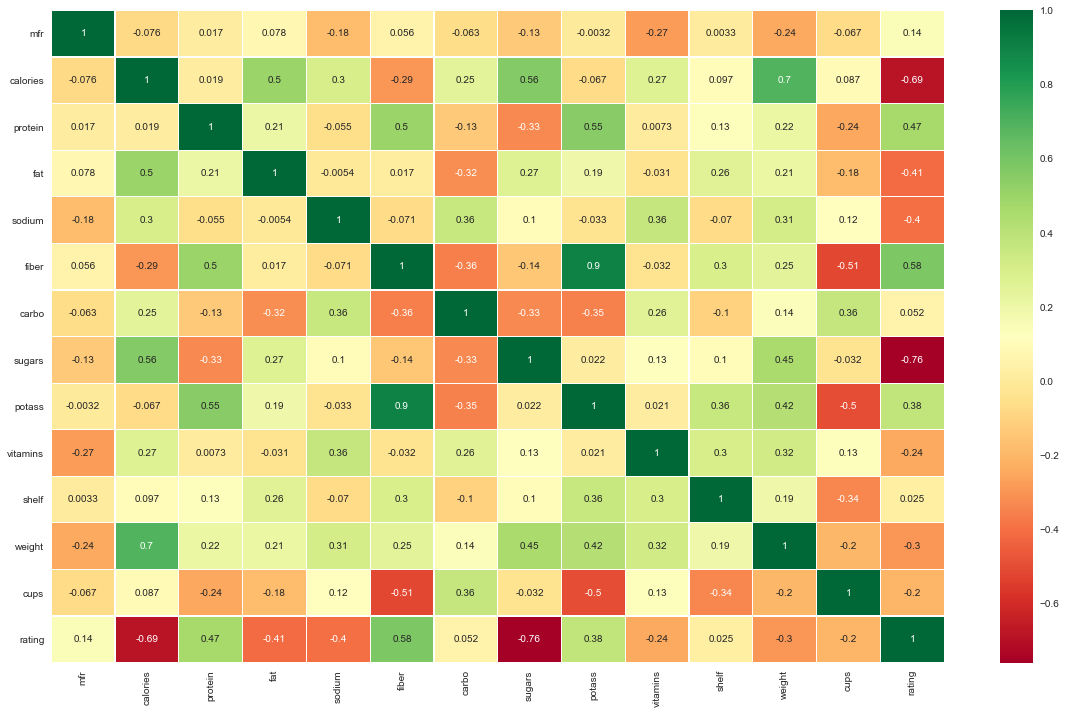

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.savefig('corr.jpg')
plt.show()

In [14]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.89
to_drop = [column for column in upper.columns if any(upper[column] > 0.89)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [15]:
df.shape

(77, 14)

In [16]:
df.head()

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,shelf,weight,cups,rating
0,100% Bran,3,70,4,1,130,10.0,5.0,6,25,3,1.0,0.33,68.402973
1,100% Natural Bran,5,120,3,5,15,2.0,8.0,8,0,3,1.0,1.00,33.983679
2,All-Bran,2,70,4,1,260,9.0,7.0,5,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,2,50,4,0,140,14.0,8.0,0,25,3,1.0,0.50,93.704912
4,Almond Delight,6,110,2,2,200,1.0,14.0,8,25,3,1.0,0.75,34.384843


In [17]:
name = df['name']

In [18]:
y = df['rating']

In [19]:
dff = df.copy()

In [20]:
del dff['rating']

In [21]:
del dff['name']

In [22]:
dff.shape

(77, 12)

In [23]:
X = dff

In [24]:
print(X.shape)

(77, 12)


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [27]:
linearModel = LinearRegression() 
linearModel.fit(X_train, y_train) 
  
# Evaluating the Linear Regression model 
print(linearModel.score(X_test, y_test)) 

0.9937015904614255
